# Random cluster examples

To express the usage and simplicity of SPIN we will make a simple example with some random clusters in the plane. The random clusters will be generated by multivariate gaussians with random center and a random standard deviation equal for both dimensions.

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from spin import SideToSideSPIN, NeighborhoodSPIN
from spin.distances import l2_distance_matrix

%matplotlib inline

## Generating Data

In [2]:
n_clusters = 5
n_points_per_cluster = 1000

cluster_points = []

for i in range(n_clusters):
    center = (np.random.uniform(0, 4), np.random.uniform(0, 4))
    std = np.random.uniform(0, 0.1, 1)
    cov_matrix = [[std, 0], [0, std]]
    points = np.random.multivariate_normal(center,
                                           cov_matrix,
                                           n_points_per_cluster).T
    cluster_points.append(points)

### Visualizing data

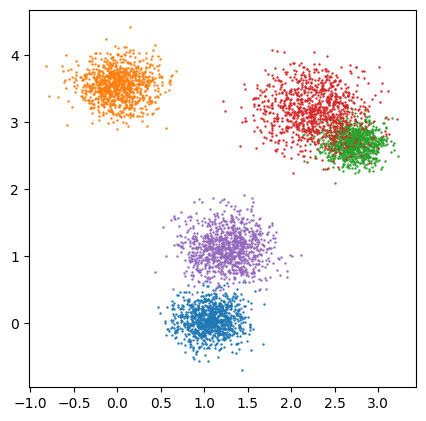

In [3]:
f, ax = plt.subplots(figsize=(5, 5), dpi=100)
for i in range(n_clusters):
    ax.scatter(*cluster_points[i], s=.5)

## Joining and shuffling all cluster points

To test SPIN reorder ability lets put all points in random order.

In [4]:
points = np.concatenate(cluster_points, axis=1)
index = [i for i in range(points.shape[1])]
np.random.shuffle(index)
points = points[:, index]

In [6]:
points.shape

(2, 5000)

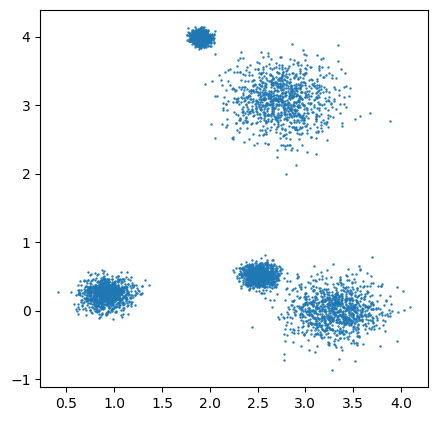

In [5]:
f, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.scatter(*points, s=0.5)

## Distances

In [6]:
distances = l2_distance_matrix(points, points)

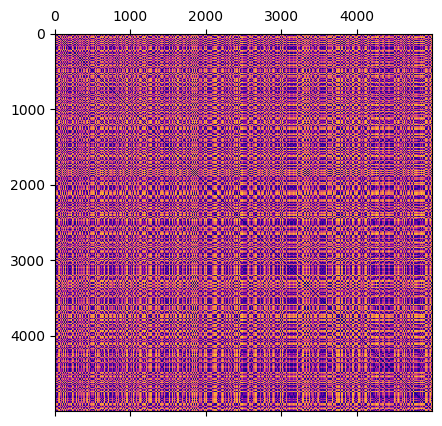

In [7]:
f, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.matshow(distances, cmap="plasma")

## Neighborhood SPIN

In [9]:
nspin = NeighborhoodSPIN()

In [10]:
nspin.run(distances)

[[1.         0.9999998  0.99999922 ... 0.00762018 0.00760532 0.00759049]
 [0.9999998  1.         0.9999998  ... 0.00763507 0.00762018 0.00760532]
 [0.99999922 0.9999998  1.         ... 0.00764998 0.00763507 0.00762018]
 ...
 [0.00762018 0.00763507 0.00764998 ... 1.         0.9999998  0.99999922]
 [0.00760532 0.00762018 0.00763507 ... 0.9999998  1.         0.9999998 ]
 [0.00759049 0.00760532 0.00762018 ... 0.99999922 0.9999998  1.        ]]
....0: Energy = 9807.21732833919
1: Energy = 9807.21732833919


KeyboardInterrupt: 

In [ ]:
f, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.matshow(sts_spin.ordered_distances_, cmap="plasma")

In [ ]:
f, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.matshow(sts_spin.permutation_, cmap="plasma")